##  Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import re
from collections import Counter
import ast
from itertools import combinations
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors



from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth




In [ ]:
import pandas as pd 

diet_data = pd.read_csv(r'C:\Users\mrmte\Documents\2CS_IASD\ML\mini_projet_fitness_recommendation\data\recipes.csv\recipes.csv')


In [ ]:
diet_data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [ ]:
diet_data.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

In [ ]:
diet_data.dtypes

RecipeId                        int64
Name                           object
AuthorId                        int64
AuthorName                     object
CookTime                       object
PrepTime                       object
TotalTime                      object
DatePublished                  object
Description                    object
Images                         object
RecipeCategory                 object
Keywords                       object
RecipeIngredientQuantities     object
RecipeIngredientParts          object
AggregatedRating              float64
ReviewCount                   float64
Calories                      float64
FatContent                    float64
SaturatedFatContent           float64
CholesterolContent            float64
SodiumContent                 float64
CarbohydrateContent           float64
FiberContent                  float64
SugarContent                  float64
ProteinContent                float64
RecipeServings                float64
RecipeYield 

In [ ]:
diet_data['RecipeCategory'].unique()

array(['Frozen Desserts', 'Chicken Breast', 'Beverages', 'Soy/Tofu',
       'Vegetable', 'Pie', 'Chicken', 'Dessert', 'Southwestern U.S.',
       'Sauces', 'Stew', 'Black Beans', '< 60 Mins', 'Lactose Free',
       'Weeknight', 'Yeast Breads', 'Whole Chicken', 'High Protein',
       'Cheesecake', 'Free Of...', 'High In...', 'Brazilian', 'Breakfast',
       'Breads', 'Bar Cookie', 'Brown Rice', 'Oranges', 'Pork',
       'Low Protein', 'Asian', 'Potato', 'Cheese', 'Halibut', 'Meat',
       'Lamb/Sheep', 'Very Low Carbs', 'Spaghetti', 'Scones',
       'Drop Cookies', 'Lunch/Snacks', 'Beans', 'Punch Beverage',
       'Pineapple', 'Low Cholesterol', '< 30 Mins', 'Quick Breads',
       'Sourdough Breads', 'Curries', 'Chicken Livers', 'Coconut',
       'Savory Pies', 'Poultry', 'Steak', 'Healthy', 'Lobster', 'Rice',
       'Apple', 'Broil/Grill', 'Spreads', 'Crab', 'Jellies', 'Pears',
       'Chowders', 'Cauliflower', 'Candy', 'Chutneys', 'White Rice',
       'Tex Mex', 'Bass', 'German', 'Fru

In [ ]:
# Dataset dimensions
print(f"Number of rows: {diet_data.shape[0]}, Number of columns: {diet_data.shape[1]}")

Number of rows: 522517, Number of columns: 28


## Data Cleaning and EDA

### Handle Missing Values

#### Identify Missing Values

In [ ]:
diet_data.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [ ]:
# Check for missing values
missing_values = diet_data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(diet_data)) * 100
print(pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage}))




                            Missing Values  Percentage
RecipeYield                         348071   66.614292
AggregatedRating                    253223   48.462155
ReviewCount                         247489   47.364775
RecipeServings                      182911   35.005751
CookTime                             82545   15.797572
Keywords                             17237    3.298840
RecipeCategory                         751    0.143727
Description                              5    0.000957
RecipeIngredientQuantities               3    0.000574
Images                                   1    0.000191
Name                                     0    0.000000
AuthorId                                 0    0.000000
TotalTime                                0    0.000000
PrepTime                                 0    0.000000
DatePublished                            0    0.000000
AuthorName                               0    0.000000
RecipeId                                 0    0.000000
FatContent

#### Column-specific Cleaning

##### CookTime

In [ ]:
def parse_time(time_str):
    if pd.isnull(time_str):
        return 0  # Replace missing times with 0 minutes
    match = re.match(r'PT(\d+H)?(\d+M)?', time_str)
    hours = int(match.group(1)[:-1]) if match.group(1) else 0
    minutes = int(match.group(2)[:-1]) if match.group(2) else 0
    return hours * 60 + minutes

diet_data['CookTime'] = diet_data['CookTime'].apply(parse_time)
diet_data['CookTime'] 


0         1440
1           25
2            5
3           20
4           30
          ... 
522512      35
522513     180
522514     180
522515       0
522516      25
Name: CookTime, Length: 522517, dtype: int64

##### Description

In [ ]:
diet_data['Description'].fillna("No description available", inplace=True)


C:\Users\mrmte\AppData\Local\Temp\ipykernel_4912\998401541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diet_data['Description'].fillna("No description available", inplace=True)


##### RecipeCategory

In [ ]:
diet_data['RecipeCategory'].fillna("Unknown", inplace=True)


C:\Users\mrmte\AppData\Local\Temp\ipykernel_4912\2945628117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diet_data['RecipeCategory'].fillna("Unknown", inplace=True)


##### Keywords

In [ ]:
diet_data['Keywords'].fillna("No keywords", inplace=True)
diet_data['Keywords'] = diet_data['Keywords'].str.split(',')
diet_data['Keywords']


C:\Users\mrmte\AppData\Local\Temp\ipykernel_4912\523343966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diet_data['Keywords'].fillna("No keywords", inplace=True)


0         [c("Dessert",  "Low Protein",  "Low Cholestero...
1         [c("Chicken Thigh & Leg",  "Chicken",  "Poultr...
2         [c("Low Protein",  "Low Cholesterol",  "Health...
3         [c("Beans",  "Vegetable",  "Low Cholesterol", ...
4         [c("Low Protein",  "Vegan",  "Low Cholesterol"...
                                ...                        
522512                                        ["< 4 Hours"]
522513     [c("High Protein",  "High In...",  "< 4 Hours")]
522514                         [c("Dessert",  "< 4 Hours")]
522515                            [c("< 15 Mins",  "Easy")]
522516                                        ["< 60 Mins"]
Name: Keywords, Length: 522517, dtype: object

##### RecipeIngredientQuantities

In [ ]:
print(diet_data['RecipeIngredientQuantities'].head())


0                              c("4", "1/4", "1", "1")
1    c("1", "4", "2", "2", "8", "1/4", "8", "1/2", ...
2              c("1 1/2", "1", NA, "1 1/2", NA, "3/4")
3    c("12", "1", "2", "1", "10", "1", "3", "2", "2...
4                          c("46", "4", "1", "2", "1")
Name: RecipeIngredientQuantities, dtype: object


In [ ]:
import ast

def convert_to_list(entry):
    try:
        # Handle missing values like NA
        if pd.isna(entry):
            return []
        
        # Remove the `c(...)` wrapping and replace with a Python list
        if entry.startswith('c(') and entry.endswith(')'):
            cleaned_entry = entry[2:-1]  
            cleaned_entry = cleaned_entry.replace('NA', 'None')  
            # Convert the cleaned string into a list using ast.literal_eval
            return ast.literal_eval(f"[{cleaned_entry}]")
        else:
            return []
    except (ValueError, SyntaxError):
        return []  

# Apply the function to the column
diet_data['RecipeIngredientQuantities'] = diet_data['RecipeIngredientQuantities'].apply(convert_to_list)

# Verify the result
print(diet_data['RecipeIngredientQuantities'].head())


0                                       [4, 1/4, 1, 1]
1    [1, 4, 2, 2, 8, 1/4, 8, 1/2, 1, 1, 1/4, 1/4, 1...
2                   [1 1/2, 1, None, 1 1/2, None, 3/4]
3    [12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1/2, 1/...
4                                     [46, 4, 1, 2, 1]
Name: RecipeIngredientQuantities, dtype: object


#####  AggregatedRating

In [ ]:
diet_data['AggregatedRating'].fillna(diet_data['AggregatedRating'].mean(), inplace=True)
diet_data['AggregatedRating']

C:\Users\mrmte\AppData\Local\Temp\ipykernel_4912\889466256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diet_data['AggregatedRating'].fillna(diet_data['AggregatedRating'].mean(), inplace=True)


0         4.500000
1         3.000000
2         4.500000
3         4.500000
4         4.500000
            ...   
522512    4.632014
522513    4.632014
522514    4.632014
522515    4.632014
522516    4.632014
Name: AggregatedRating, Length: 522517, dtype: float64

##### ReviewCount

In [ ]:
diet_data['ReviewCount'].fillna(0, inplace=True)
diet_data['ReviewCount']

C:\Users\mrmte\AppData\Local\Temp\ipykernel_4912\3238726643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diet_data['ReviewCount'].fillna(0, inplace=True)


0          4.0
1          1.0
2         10.0
3          2.0
4         11.0
          ... 
522512     0.0
522513     0.0
522514     0.0
522515     0.0
522516     0.0
Name: ReviewCount, Length: 522517, dtype: float64

##### RecipeServings

In [ ]:
diet_data['RecipeServings'].fillna(1, inplace=True)
diet_data['RecipeServings']

C:\Users\mrmte\AppData\Local\Temp\ipykernel_4912\1030010306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diet_data['RecipeServings'].fillna(1, inplace=True)


0         4.0
1         6.0
2         4.0
3         2.0
4         4.0
         ... 
522512    8.0
522513    8.0
522514    6.0
522515    1.0
522516    1.0
Name: RecipeServings, Length: 522517, dtype: float64

##### RecipeYield

In [ ]:
diet_data.drop(['RecipeYield'], axis=1, inplace=True)


#### Parse and Clean Columns

##### RecipeIngredientParts

In [ ]:
diet_data['RecipeIngredientParts'][1]

'c("saffron", "milk", "hot green chili peppers", "onions", "garlic", "clove", "peppercorns", "cardamom seed", "cumin seed", "poppy seed", "mace", "cilantro", "mint leaf", "fresh lemon juice", "plain yogurt", "boneless chicken", "salt", "ghee", "onion", "tomatoes", "basmati rice", "long-grain rice", "raisins", "cashews", "eggs")'

In [ ]:
def parse_ingredient_parts(ingredient_str):
    # Handle missing or invalid values
    if pd.isnull(ingredient_str):
        return []
    # Remove R-style c(...) wrapping
    clean_str = ingredient_str.strip('c()')
    # Split by comma, removing quotes and whitespace
    ingredients = [ing.strip().strip('"') for ing in clean_str.split(',')]
    return ingredients

diet_data['RecipeIngredientParts'] = diet_data['RecipeIngredientParts'].apply(parse_ingredient_parts)
diet_data['RecipeIngredientParts']


0         [blueberries, granulated sugar, vanilla yogurt...
1         [saffron, milk, hot green chili peppers, onion...
2         [sugar, lemons, rind of, lemon, zest of, fresh...
3         [extra firm tofu, eggplant, zucchini, mushroom...
4         [plain tomato juice, cabbage, onion, carrots, ...
                                ...                        
522512    [fresh ginger, unsalted butter, dark brown sug...
522513    [Dijon mustard, garlic, peppercorns, shallot, ...
522514          [half-and-half, heavy cream, brandy, sugar]
522515    [wasabi paste, dill, English cucumber, smoked ...
522516    [hard-boiled eggs, breakfast sausage, panko br...
Name: RecipeIngredientParts, Length: 522517, dtype: object

##### Keywords

In [ ]:
diet_data['Keywords'] = diet_data['Keywords'].apply(lambda x: [k.strip().lower() for k in x])
diet_data['Keywords']

0         [c("dessert", "low protein", "low cholesterol"...
1         [c("chicken thigh & leg", "chicken", "poultry"...
2         [c("low protein", "low cholesterol", "healthy"...
3         [c("beans", "vegetable", "low cholesterol", "w...
4         [c("low protein", "vegan", "low cholesterol", ...
                                ...                        
522512                                        ["< 4 hours"]
522513       [c("high protein", "high in...", "< 4 hours")]
522514                          [c("dessert", "< 4 hours")]
522515                             [c("< 15 mins", "easy")]
522516                                        ["< 60 mins"]
Name: Keywords, Length: 522517, dtype: object

##### Times (CookTime, PrepTime, TotalTime)

In [ ]:
diet_data['PrepTime'] = diet_data['PrepTime'].apply(parse_time)
diet_data['PrepTime']


0           45
1          240
2           30
3         1440
4           20
          ... 
522512      60
522513      30
522514      60
522515      15
522516      15
Name: PrepTime, Length: 522517, dtype: int64

In [ ]:
diet_data['TotalTime'] = diet_data['TotalTime'].apply(parse_time)
diet_data['TotalTime']

0         1485
1          265
2           35
3         1460
4           50
          ... 
522512      95
522513     210
522514     240
522515      15
522516      40
Name: TotalTime, Length: 522517, dtype: int64

##### RecipeCategory

In [ ]:
diet_data['RecipeCategory'] = diet_data['RecipeCategory'].str.lower().str.strip()
diet_data['RecipeCategory']

0         frozen desserts
1          chicken breast
2               beverages
3                soy/tofu
4               vegetable
               ...       
522512            dessert
522513     very low carbs
522514          ice cream
522515           canadian
522516          breakfast
Name: RecipeCategory, Length: 522517, dtype: object

#### Normalize Numerical Columns

In [ ]:

scaler = MinMaxScaler()

cols_to_normalize = ['Calories', 'FatContent', 'SaturatedFatContent', 
                     'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
                     'FiberContent', 'SugarContent', 'ProteinContent']
diet_data[cols_to_normalize] = scaler.fit_transform(diet_data[cols_to_normalize])


#### Remove Duplicates

In [ ]:
diet_data.drop_duplicates(subset=['RecipeId', 'Name'], keep='first', inplace=True)


#### Encode Data for Modeling

#### Encode Ingredients for Association Rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
ingredients_matrix = te.fit_transform(diet_data['RecipeIngredientParts'])
ingredients_df = pd.DataFrame(ingredients_matrix, columns=te.columns_)


#### Outlier Detection and Removal

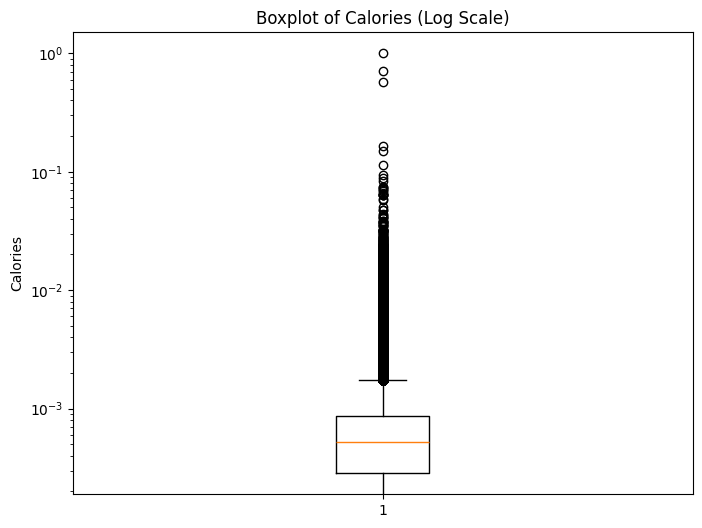

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.boxplot(diet_data['Calories'])
plt.yscale('log')  # Apply logarithmic scale
plt.title('Boxplot of Calories (Log Scale)')
plt.ylabel('Calories')
plt.show()



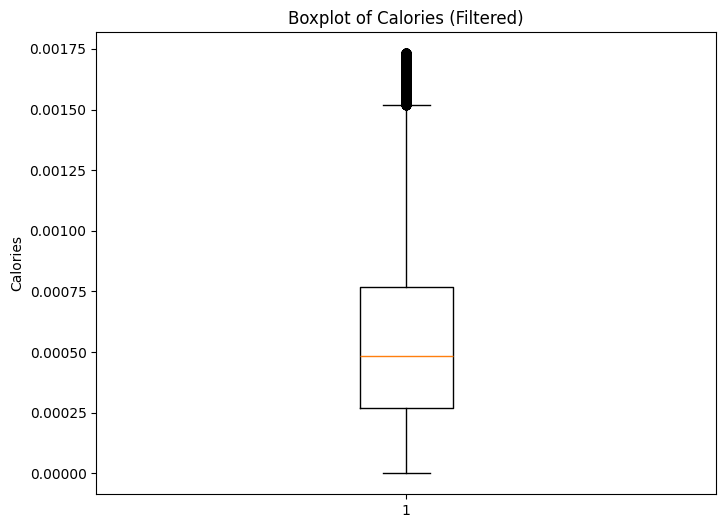

In [ ]:
# Define a threshold to filter out extreme outliers
q1 = diet_data['Calories'].quantile(0.25)
q3 = diet_data['Calories'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter data
filtered_data = diet_data[(diet_data['Calories'] >= lower_bound) & (diet_data['Calories'] <= upper_bound)]

# Boxplot without extreme outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['Calories'])
plt.title('Boxplot of Calories (Filtered)')
plt.ylabel('Calories')
plt.show()


#### Validate Cleaned Data

In [ ]:
diet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    522517 non-null  int64  
 5   PrepTime                    522517 non-null  int64  
 6   TotalTime                   522517 non-null  int64  
 7   DatePublished               522517 non-null  object 
 8   Description                 522517 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              522517 non-null  object 
 11  Keywords                    522517 non-null  object 
 12  RecipeIngredientQuantities  522517 non-null  object 
 13  RecipeIngredie

In [ ]:
diet_data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,1440,45,1485,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.000039,0.000049,0.000061,0.000024,0.000343,0.001195,0.000333,0.000174,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,25,240,265,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.000913,0.000621,0.002858,0.000295,0.000779,0.002988,0.000225,0.003446,6.0,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,5,30,35,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.000003,0.000000,0.000000,0.000001,0.000753,0.000133,0.000851,0.000016,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,20,1440,1460,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.000373,0.000142,0.000000,0.001250,0.000593,0.005744,0.000354,0.001593,2.0,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,30,20,50,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.000006,0.000004,0.000000,0.000769,0.000232,0.001594,0.000195,0.000234,4.0,"c(""Mix everything together and bring to a boil..."


In [ ]:
diet_data.isnull().sum()

RecipeId                      0
Name                          0
AuthorId                      0
AuthorName                    0
CookTime                      0
PrepTime                      0
TotalTime                     0
DatePublished                 0
Description                   0
Images                        1
RecipeCategory                0
Keywords                      0
RecipeIngredientQuantities    0
RecipeIngredientParts         0
AggregatedRating              0
ReviewCount                   0
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings                0
RecipeInstructions            0
dtype: int64

In [ ]:
diet_data['CookTime'].head()

0    1440
1      25
2       5
3      20
4      30
Name: CookTime, dtype: int64

In [ ]:
diet_data['FatContent'].head()

0    0.000039
1    0.000913
2    0.000003
3    0.000373
4    0.000006
Name: FatContent, dtype: float64

In [ ]:
diet_data['CholesterolContent'].head()

0    0.000061
1    0.002858
2    0.000000
3    0.000000
4    0.000000
Name: CholesterolContent, dtype: float64

In [ ]:
diet_data['CarbohydrateContent'].head()

0    0.000343
1    0.000779
2    0.000753
3    0.000593
4    0.000232
Name: CarbohydrateContent, dtype: float64

In [ ]:
diet_data['FiberContent'].head()

0    0.001195
1    0.002988
2    0.000133
3    0.005744
4    0.001594
Name: FiberContent, dtype: float64

In [ ]:
diet_data['SugarContent'].head()

0    0.000333
1    0.000225
2    0.000851
3    0.000354
4    0.000195
Name: SugarContent, dtype: float64

In [ ]:
diet_data['ProteinContent'].head()

0    0.000174
1    0.003446
2    0.000016
3    0.001593
4    0.000234
Name: ProteinContent, dtype: float64

In [ ]:
diet_data['Calories'].head()

0    0.000279
1    0.001812
2    0.000508
3    0.000875
4    0.000169
Name: Calories, dtype: float64

In [ ]:
# Step 1: Get the minimum and maximum values
min_calories = diet_data['Calories'].min()
max_calories = diet_data['Calories'].max()

NameError: name 'diet_data' is not defined

In [ ]:
# Step 1: Replace NaN in 'Calories' with 0
diet_data['Calories'] = diet_data['Calories'].fillna(0)

# Step 2: Scale the values in 'Calories' by multiplying by 10^6
diet_data['Calories'] = diet_data['Calories'] * 1e6

# Step 3: Replace any NaN in 'Calories' (if necessary, though not expected here)
diet_data['Calories'] = diet_data['Calories'].fillna(0)

# Print the resulting DataFrame
diet_data['Calories']


0          278.858966
1         1812.338522
2          507.624484
3          874.758874
4          169.044990
             ...     
522512     516.598880
522513    3366.867117
522514    2074.390891
522515      26.270505
522516    1783.946796
Name: Calories, Length: 522517, dtype: float64

In [ ]:

# Step 1: Get the minimum and maximum values
min_calories = diet_data['Calories'].min()
max_calories = diet_data['Calories'].max()

# Step 2: Get descriptive statistics
stats = diet_data['Calories'].describe()

# Step 3: Print the statistics
print(f"Minimum Calories: {min_calories}")
print(f"Maximum Calories: {max_calories}")
print("Descriptive Statistics:")
print(stats)

# Step 4: Determine ranges based on quantiles (optional)
quantiles = diet_data['Calories'].quantile([0.2, 0.4, 0.6, 0.8])
print("\nQuantiles (20%, 40%, 60%, 80%):")
print(quantiles)

Minimum Calories: 0.0
Maximum Calories: 1000000.0
Descriptive Statistics:
count     522517.000000
mean         790.462501
std         2279.686975
min            0.000000
25%          284.243604
50%          517.414734
75%          863.336915
max      1000000.000000
Name: Calories, dtype: float64

Quantiles (20%, 40%, 60%, 80%):
0.2    240.513818
0.4    418.696376
0.6    630.328956
0.8    979.677725
Name: Calories, dtype: float64


In [ ]:
# Define bins based on quantiles and descriptive statistics
bins = [0, 240.51, 418.69, 630.33, 979.68, 1000000]  # Min, quantiles, and max
labels = ['0-240', '241-418', '419-630', '631-979', '980-1000000']  # Corresponding labels

# Assign ranges to the 'Calories' column
diet_data['Calories_range'] = pd.cut(
    diet_data['Calories'], bins=bins, labels=labels, include_lowest=True
)

# Print the resulting DataFrame
diet_data['Calories_range']
diet_data.head()


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Calories_range
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,1440,45,1485,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.000049,0.000061,0.000024,0.000343,0.001195,0.000333,0.000174,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",241-418
1,39,Biryani,1567,elly9812,25,240,265,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.000621,0.002858,0.000295,0.000779,0.002988,0.000225,0.003446,6.0,"c(""Soak saffron in warm milk for 5 minutes and...",980-1000000
2,40,Best Lemonade,1566,Stephen Little,5,30,35,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.000000,0.000000,0.000001,0.000753,0.000133,0.000851,0.000016,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ...",419-630
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,20,1440,1460,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.000142,0.000000,0.001250,0.000593,0.005744,0.000354,0.001593,2.0,"c(""Drain the tofu, carefully squeezing out exc...",631-979
4,42,Cabbage Soup,1538,Duckie067,30,20,50,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.000004,0.000000,0.000769,0.000232,0.001594,0.000195,0.000234,4.0,"c(""Mix everything together and bring to a boil...",0-240


In [ ]:
diet_data['Calories_range'][0]

'241-418'

In [ ]:
diet_data['Calories'][0]

np.float64(278.85896589501004)

In [ ]:
# List of columns to process
columns_to_categorize = [
    'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
    'SugarContent', 'ProteinContent'
]

# Function to calculate thresholds dynamically
def calculate_thresholds(series):
    low_threshold = series.quantile(0.33)
    high_threshold = series.quantile(0.66)
    return low_threshold, high_threshold

# Function to categorize values
def categorize(value, low, high):
    if pd.isna(value):
        return 'None'
    elif value <= low:
        return 'low'
    elif value <= high:
        return 'medium'
    else:
        return 'high'

# Process each column
for column in columns_to_categorize:
    # Calculate thresholds for the column
    low, high = calculate_thresholds(diet_data[column])
    
    # Categorize and overwrite the original column
    diet_data[column] = diet_data[column].apply(lambda x: categorize(x, low, high))

# Display the updated DataFrame
diet_data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Calories_range
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,1440,45,1485,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,low,low,low,medium,high,high,low,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",241-418
1,39,Biryani,1567,elly9812,25,240,265,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,high,high,medium,high,high,high,high,6.0,"c(""Soak saffron in warm milk for 5 minutes and...",980-1000000
2,40,Best Lemonade,1566,Stephen Little,5,30,35,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,low,low,low,high,low,high,low,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ...",419-630
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,20,1440,1460,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,medium,low,high,high,high,high,high,2.0,"c(""Drain the tofu, carefully squeezing out exc...",631-979
4,42,Cabbage Soup,1538,Duckie067,30,20,50,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,low,low,high,medium,high,high,low,4.0,"c(""Mix everything together and bring to a boil...",0-240


In [ ]:
diet_data['SugarContent'].head()

0    high
1    high
2    high
3    high
4    high
Name: SugarContent, dtype: object

In [ ]:
diet_data.to_csv('../../data/cleaned_recipes.csv', index=False)


In [ ]:
diet_data.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions', 'Calories_range'],
      dtype='object')

In [ ]:
diet_data.dtypes

RecipeId                         int64
Name                            object
AuthorId                         int64
AuthorName                      object
CookTime                         int64
PrepTime                         int64
TotalTime                        int64
DatePublished                   object
Description                     object
Images                          object
RecipeCategory                  object
Keywords                        object
RecipeIngredientQuantities      object
RecipeIngredientParts           object
AggregatedRating               float64
ReviewCount                    float64
Calories                       float64
FatContent                      object
SaturatedFatContent             object
CholesterolContent              object
SodiumContent                   object
CarbohydrateContent             object
FiberContent                    object
SugarContent                    object
ProteinContent                  object
RecipeServings           

### Numerical Features Analysis

In [ ]:
diet_data_cleaned = pd.read_csv(r'C:\Users\mrmte\Documents\2CS_IASD\ML\mini_projet_fitness_recommendation\data\cleaned_recipes.csv')
diet_data_cleaned.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,Calories_range
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,1440,45,1485,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,low,low,low,medium,high,high,low,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",241-418
1,39,Biryani,1567,elly9812,25,240,265,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,high,high,medium,high,high,high,high,6.0,"c(""Soak saffron in warm milk for 5 minutes and...",980-1000000
2,40,Best Lemonade,1566,Stephen Little,5,30,35,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,low,low,low,high,low,high,low,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ...",419-630
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,20,1440,1460,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,medium,low,high,high,high,high,high,2.0,"c(""Drain the tofu, carefully squeezing out exc...",631-979
4,42,Cabbage Soup,1538,Duckie067,30,20,50,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,low,low,high,medium,high,high,low,4.0,"c(""Mix everything together and bring to a boil...",0-240


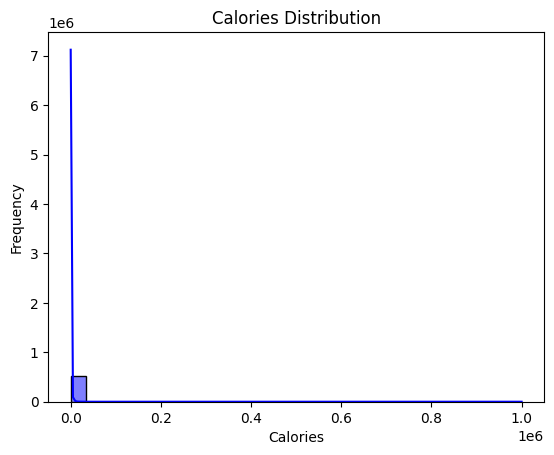

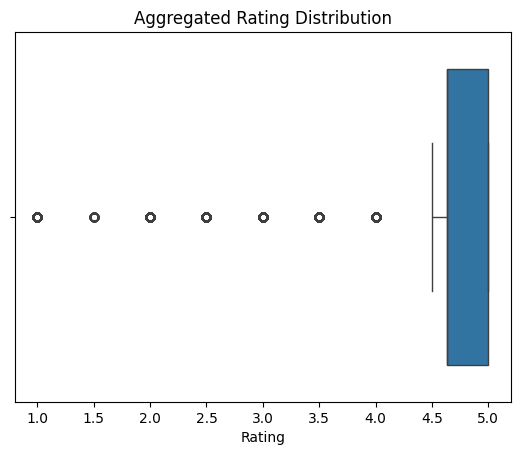

In [ ]:

# Visualize calorie distribution
sns.histplot(diet_data_cleaned["Calories"], bins=30, kde=True, color="blue")
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()



# Visualize rating distribution
sns.boxplot(x=diet_data_cleaned["AggregatedRating"])
plt.title("Aggregated Rating Distribution")
plt.xlabel("Rating")
plt.show()

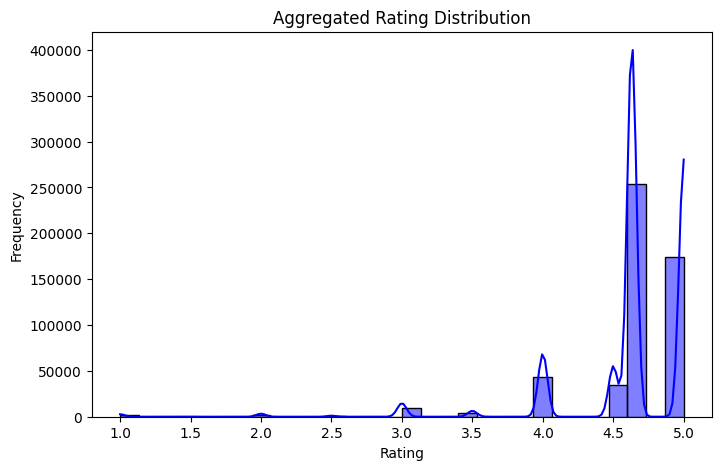

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(diet_data_cleaned["AggregatedRating"], kde=True, bins=30, color="blue")
plt.title("Aggregated Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


### Categorical Features Analysis

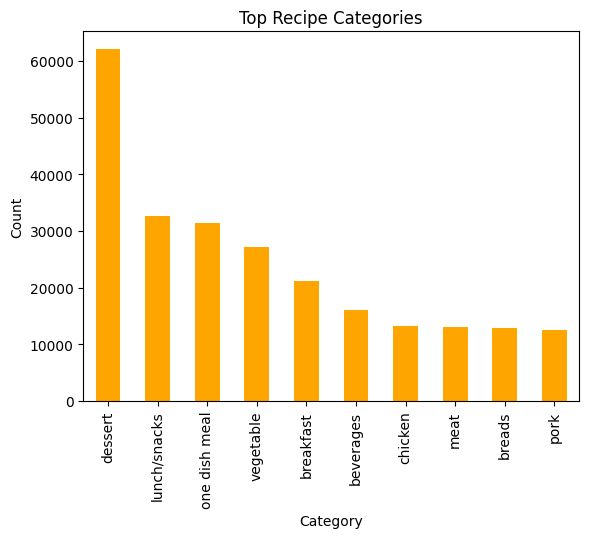

In [ ]:
# Count unique categories in RecipeCategory
category_counts = diet_data_cleaned["RecipeCategory"].value_counts()

# Plot top 10 categories
category_counts.head(10).plot(kind="bar", color="orange")
plt.title("Top Recipe Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


#### Most Common Ingredients Analysis

##### Analyze the frequency of ingredients

In [ ]:
diet_data_cleaned["RecipeIngredientParts"][1]

"['saffron', 'milk', 'hot green chili peppers', 'onions', 'garlic', 'clove', 'peppercorns', 'cardamom seed', 'cumin seed', 'poppy seed', 'mace', 'cilantro', 'mint leaf', 'fresh lemon juice', 'plain yogurt', 'boneless chicken', 'salt', 'ghee', 'onion', 'tomatoes', 'basmati rice', 'long-grain rice', 'raisins', 'cashews', 'eggs']"

In [ ]:

# Convert string representations of lists to actual lists
diet_data_cleaned["RecipeIngredientParts"] = diet_data_cleaned["RecipeIngredientParts"].apply(ast.literal_eval)


In [ ]:

# Flatten the list of ingredients
all_ingredients = [ingredient for sublist in diet_data_cleaned["RecipeIngredientParts"] for ingredient in sublist]

# Count the frequency of each ingredient
ingredient_counts = Counter(all_ingredients)

ingredient_counts

Counter({'salt': 199781,
         'butter': 136080,
         'sugar': 115852,
         'onion': 87546,
         'water': 84376,
         'eggs': 81187,
         'olive oil': 76724,
         'flour': 62410,
         'milk': 61247,
         'garlic cloves': 59604,
         'pepper': 49799,
         'all-purpose flour': 43678,
         'brown sugar': 42593,
         'egg': 39773,
         'baking powder': 39543,
         'garlic': 35686,
         'vanilla': 33254,
         'baking soda': 33115,
         'parmesan cheese': 32697,
         'lemon juice': 32446,
         'cinnamon': 29198,
         'black pepper': 28738,
         'vanilla extract': 27759,
         'sour cream': 27317,
         'tomatoes': 27087,
         'margarine': 26279,
         'unsalted butter': 25279,
         'cream cheese': 23763,
         'garlic powder': 23341,
         'garlic clove': 23111,
         'celery': 22669,
         'honey': 22607,
         'onions': 22271,
         'soy sauce': 19706,
         'mayonna

In [ ]:
# Convert to DataFrame
ingredient_df = pd.DataFrame(ingredient_counts.items(), columns=["Ingredient", "Count"])
ingredient_df = ingredient_df.sort_values(by="Count", ascending=False)


C:\Users\mrmte\AppData\Local\Temp\ipykernel_4912\1772204799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Ingredient", data=ingredient_df.head(20), palette="viridis")


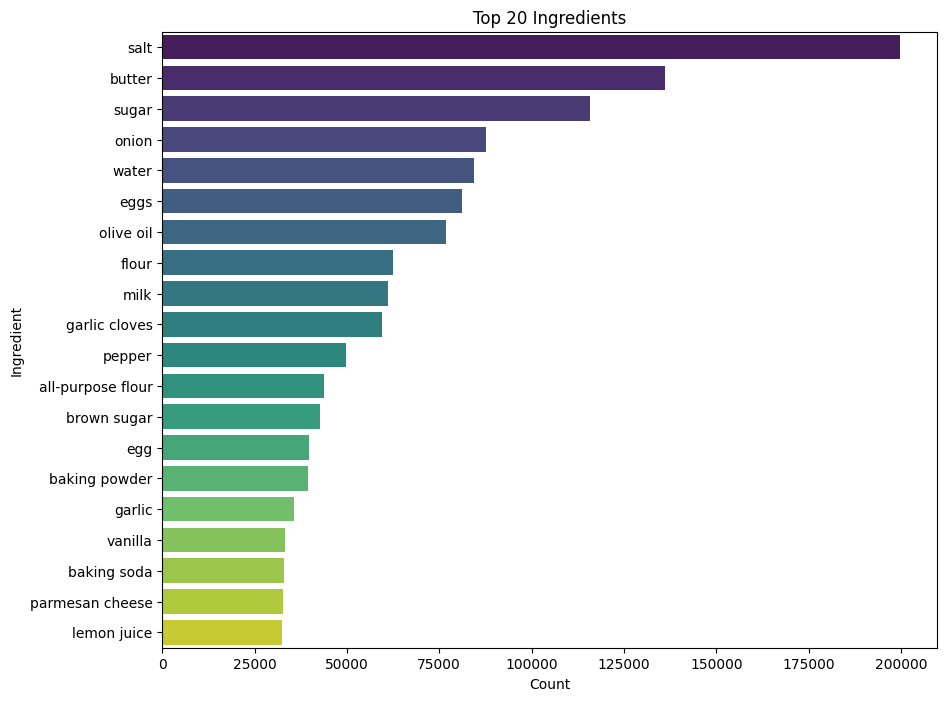

In [ ]:


# Plot the top 20 ingredients
plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y="Ingredient", data=ingredient_df.head(20), palette="viridis")
plt.title("Top 20 Ingredients")
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.show()


#### Co-occurrence of Ingredients
##### Analyze which ingredients are often used together.

In [ ]:

# Initialize co-occurrence counter
co_occurrence = defaultdict(int)

# Iterate through each list of ingredients in the cleaned dataset
for ingredients in diet_data_cleaned["RecipeIngredientParts"]:  # Use the correct column name
    for pair in combinations(ingredients, 2):  # Generate all unique pairs of ingredients
        co_occurrence[frozenset(pair)] += 1  # Increment count for the pair

# Convert the co-occurrence data into a DataFrame
co_occurrence_df = pd.DataFrame(
    [{"Pair": list(k), "Count": v} for k, v in co_occurrence.items()]
).sort_values(by="Count", ascending=False)

# Display the top 10 most common ingredient pairs
print(co_occurrence_df.head(10))


                Pair  Count
449   [salt, butter]  68459
441    [salt, sugar]  63162
438  [butter, sugar]  49874
277     [salt, eggs]  45508
906   [salt, pepper]  42814
507    [salt, flour]  41872
464    [water, salt]  39919
271    [salt, onion]  39899
614   [butter, eggs]  39826
494  [flour, butter]  38923


#### Correlation Analysis
##### Explore relationships between numerical features.

In [ ]:
# Get numerical features
numerical_features = diet_data_cleaned.select_dtypes(include=['number']).columns.tolist()
print("Numerical features:", numerical_features)


Numerical features: ['RecipeId', 'AuthorId', 'CookTime', 'PrepTime', 'TotalTime', 'AggregatedRating', 'ReviewCount', 'Calories', 'RecipeServings']


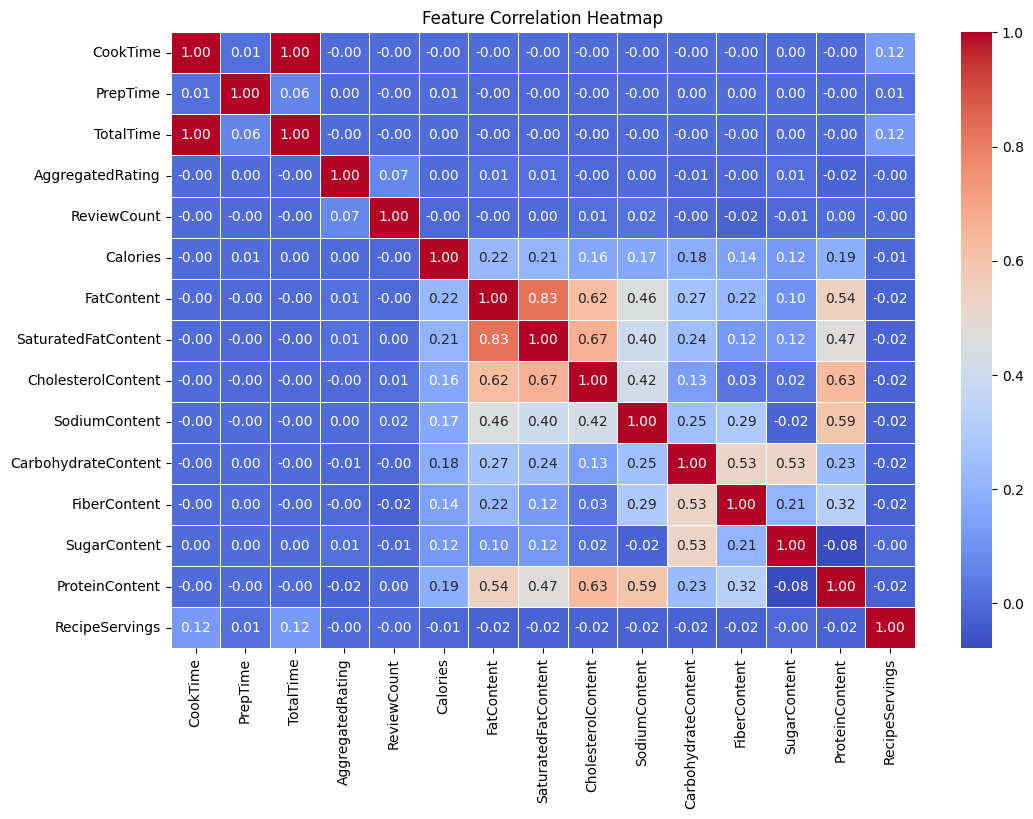

In [ ]:
# Define mapping for categorical values
value_mapping = {'low': 1, 'medium': 2, 'high': 3, 'None': 0}

# Apply mapping to the relevant columns
categorical_columns = [
    'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
    'SugarContent', 'ProteinContent'
]

for column in categorical_columns:
    diet_data_cleaned[column] = diet_data_cleaned[column].map(value_mapping)

# Compute correlation matrix
numerical_features = [
    'CookTime', 'PrepTime', 'TotalTime', 'AggregatedRating', 'ReviewCount', 
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 
    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 
    'ProteinContent', 'RecipeServings'
]

corr_matrix = diet_data_cleaned[numerical_features].corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


#### Category vs. Average Calories
##### Analyze average calorie content per recipe category.



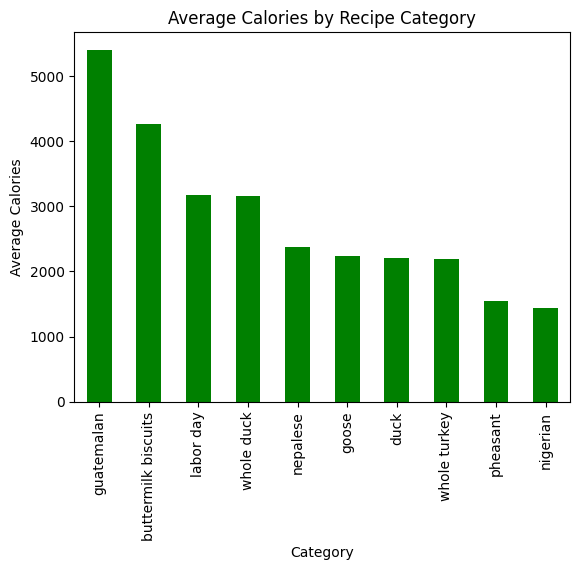

In [ ]:
avg_calories_by_category = diet_data_cleaned.groupby("RecipeCategory")["Calories"].mean().sort_values(ascending=False)

# Plot top 10 categories with highest average calories
avg_calories_by_category.head(10).plot(kind="bar", color="green")
plt.title("Average Calories by Recipe Category")
plt.xlabel("Category")
plt.ylabel("Average Calories")
plt.show()


##### Cook Time Distribution

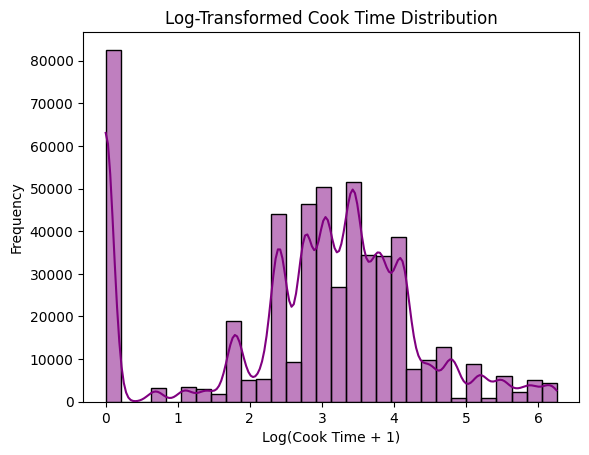

In [ ]:
# Log transformation (handles skewness)
upper_limit = diet_data_cleaned["CookTime"].quantile(0.99)
filtered_cook_time = diet_data_cleaned[diet_data_cleaned["CookTime"] <= upper_limit]["CookTime"]
transformed_cook_time = np.log1p(filtered_cook_time)

# Plot the distribution of log-transformed data
sns.histplot(transformed_cook_time.dropna(), bins=30, kde=True, color="purple")
plt.title("Log-Transformed Cook Time Distribution")
plt.xlabel("Log(Cook Time + 1)")
plt.ylabel("Frequency")
plt.show()


#### Total Time vs. Rating
##### Analyze if longer recipes tend to be rated higher

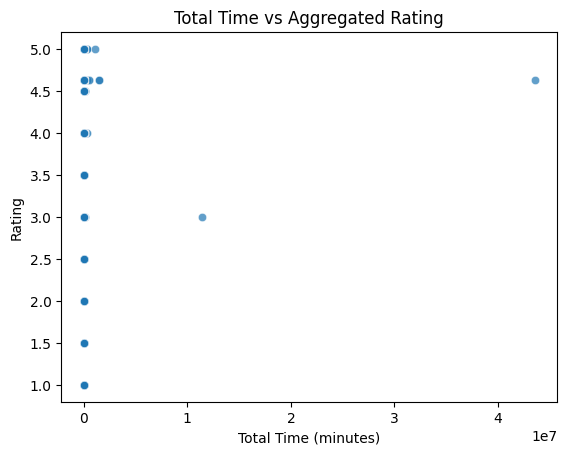

In [ ]:
sns.scatterplot(x="TotalTime", y="AggregatedRating", data=diet_data_cleaned, alpha=0.7)
plt.title("Total Time vs Aggregated Rating")
plt.xlabel("Total Time (minutes)")
plt.ylabel("Rating")
plt.show()


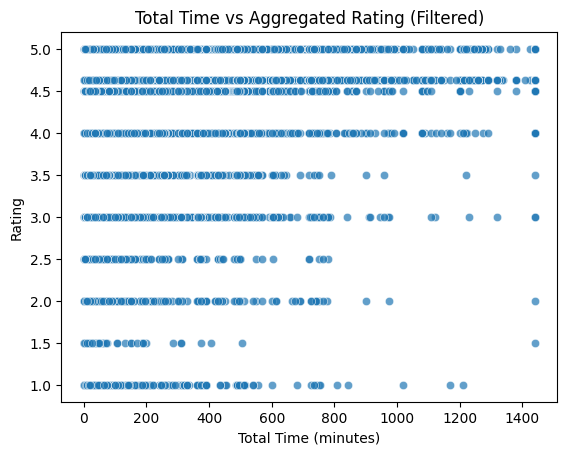

In [ ]:
# Remove extreme outliers in TotalTime
upper_limit = diet_data_cleaned["TotalTime"].quantile(0.99)
filtered_data = diet_data_cleaned[diet_data_cleaned["TotalTime"] <= upper_limit]

# Plot
sns.scatterplot(x="TotalTime", y="AggregatedRating", data=filtered_data, alpha=0.7)
plt.title("Total Time vs Aggregated Rating (Filtered)")
plt.xlabel("Total Time (minutes)")
plt.ylabel("Rating")
plt.show()


##### Distribution of Reviews

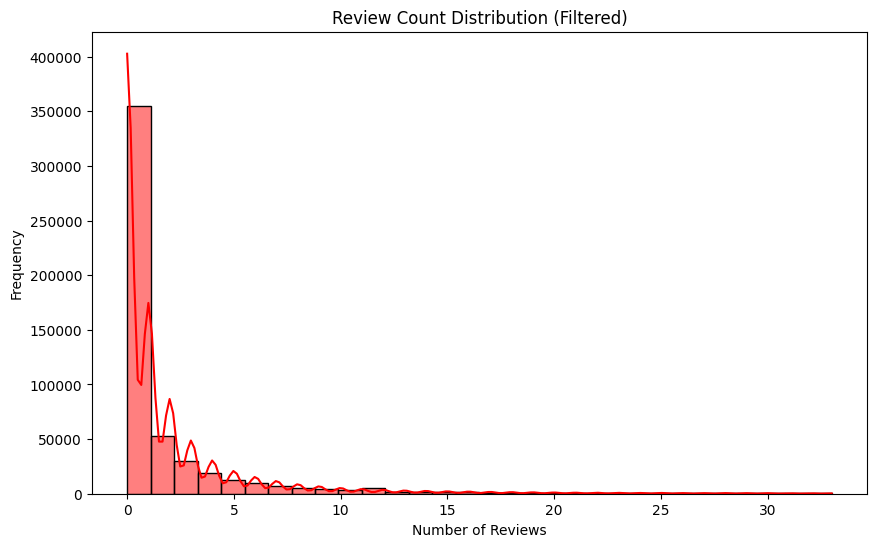

In [ ]:
# Remove extreme outliers in ReviewCount
upper_limit = diet_data_cleaned["ReviewCount"].quantile(0.99)  # Focus on the 99th percentile
filtered_data = diet_data_cleaned[diet_data_cleaned["ReviewCount"] <= upper_limit]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data["ReviewCount"].dropna(), bins=30, kde=True, color="red")
plt.title("Review Count Distribution (Filtered)")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()


#### Top Rated Recipes

In [ ]:
top_rated_recipes = diet_data_cleaned.sort_values(by="AggregatedRating", ascending=False).head(10)
print(top_rated_recipes[["Name", "AggregatedRating", "Calories"]])


                                              Name  AggregatedRating  \
33                                 Brownie Pudding               5.0   
6                           Warm Chicken A La King               5.0   
18                                  Buttermilk Pie               5.0   
17      Betty Crocker's Southwestern Guacamole Dip               5.0   
16                                     Carrot Cake               5.0   
14                                 Cafe Cappuccino               5.0   
11                        Chicken Breasts Lombardi               5.0   
8                          A Jad - Cucumber Pickle               5.0   
427705              Bahraini Sweet Rice (Muhammar)               5.0   
37                                   Alfredo Sauce               5.0   

           Calories  
33       298.276296  
6       1461.194874  
18       645.993356  
17       678.627524  
16       852.730811  
14       101.492263  
11      1024.223364  
8          7.016346  
427705   

#### Macronutrient Ratios
##### Analyze relationships between macronutrient content.

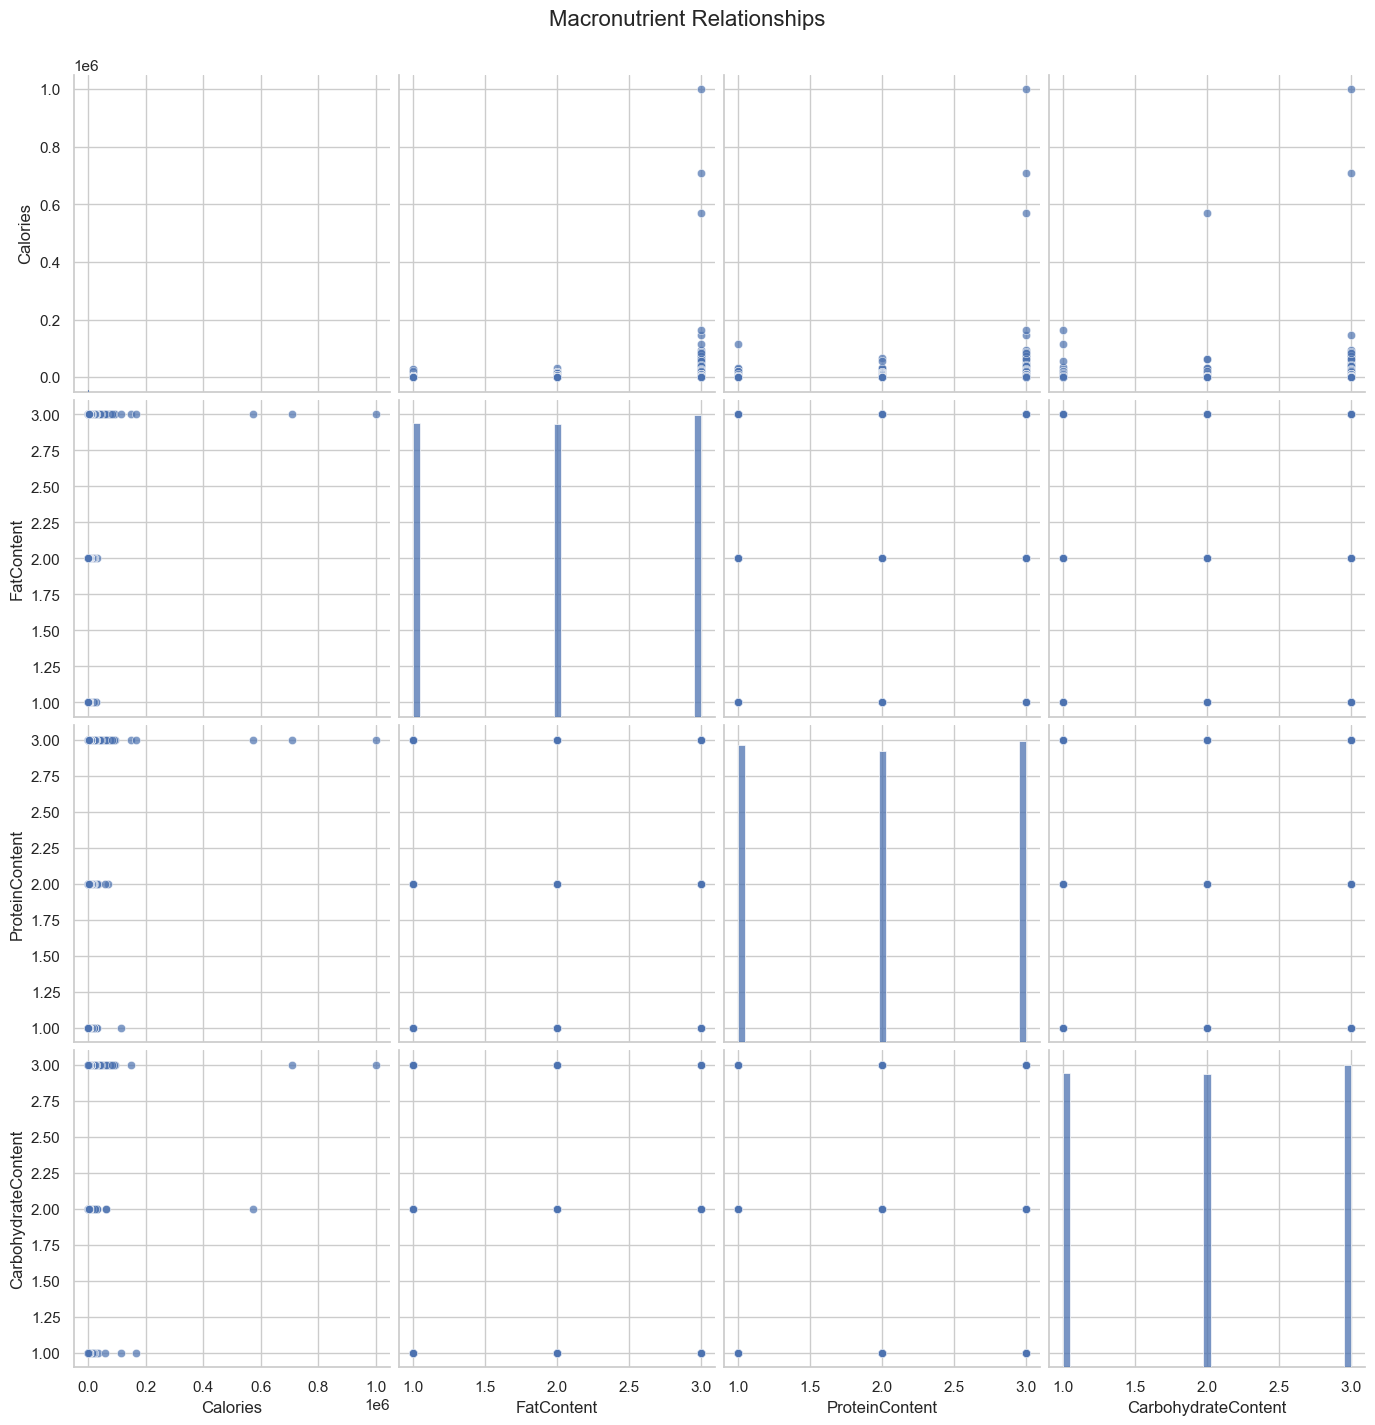

In [ ]:

# Adjust the size of the plot
sns.set(style="whitegrid")

# Create the pairplot with organized aesthetics
sns.pairplot(diet_data_cleaned[["Calories", "FatContent", "ProteinContent", "CarbohydrateContent"]],
             diag_kind="hist",  # Use histograms instead of KDE on the diagonal
             kind="scatter",    # Change to scatter plot for off-diagonal relationships
             height=3.5,         # Increase plot size for clarity
             plot_kws={'alpha': 0.7})  # Adjust transparency to reduce overlapping

# Set plot title
plt.suptitle("Macronutrient Relationships", y=1.02, fontsize=16)
plt.show()


In [ ]:
# Check for missing values in the selected columns
diet_data_cleaned[["Calories", "FatContent", "ProteinContent", "CarbohydrateContent"]].isnull().sum()

# Drop rows with missing values in these columns
diet_data_cleaned_cleaned = diet_data_cleaned.dropna(subset=["Calories", "FatContent", "ProteinContent", "CarbohydrateContent"])


In [ ]:
# Remove rows where any of the values are greater than a specific threshold
diet_data_cleaned_cleaned = diet_data_cleaned_cleaned[
    (diet_data_cleaned_cleaned["Calories"] < 1000) & 
    (diet_data_cleaned_cleaned["FatContent"] < 100) & 
    (diet_data_cleaned_cleaned["ProteinContent"] < 100) & 
    (diet_data_cleaned_cleaned["CarbohydrateContent"] < 500)
]


In [ ]:


scaler = StandardScaler()
scaled_features = scaler.fit_transform(diet_data_cleaned_cleaned[["Calories", "FatContent", "ProteinContent", "CarbohydrateContent"]])

# Add the scaled features back to the dataframe
diet_data_cleaned_cleaned[["Calories_scaled", "FatContent_scaled", "ProteinContent_scaled", "CarbohydrateContent_scaled"]] = scaled_features


In [ ]:
# Plot without too many categories (e.g., focus on the most common ones)
top_categories = diet_data_cleaned["RecipeCategory"].value_counts().head(10).index
filtered_data = diet_data_cleaned[diet_data_cleaned["RecipeCategory"].isin(top_categories)]


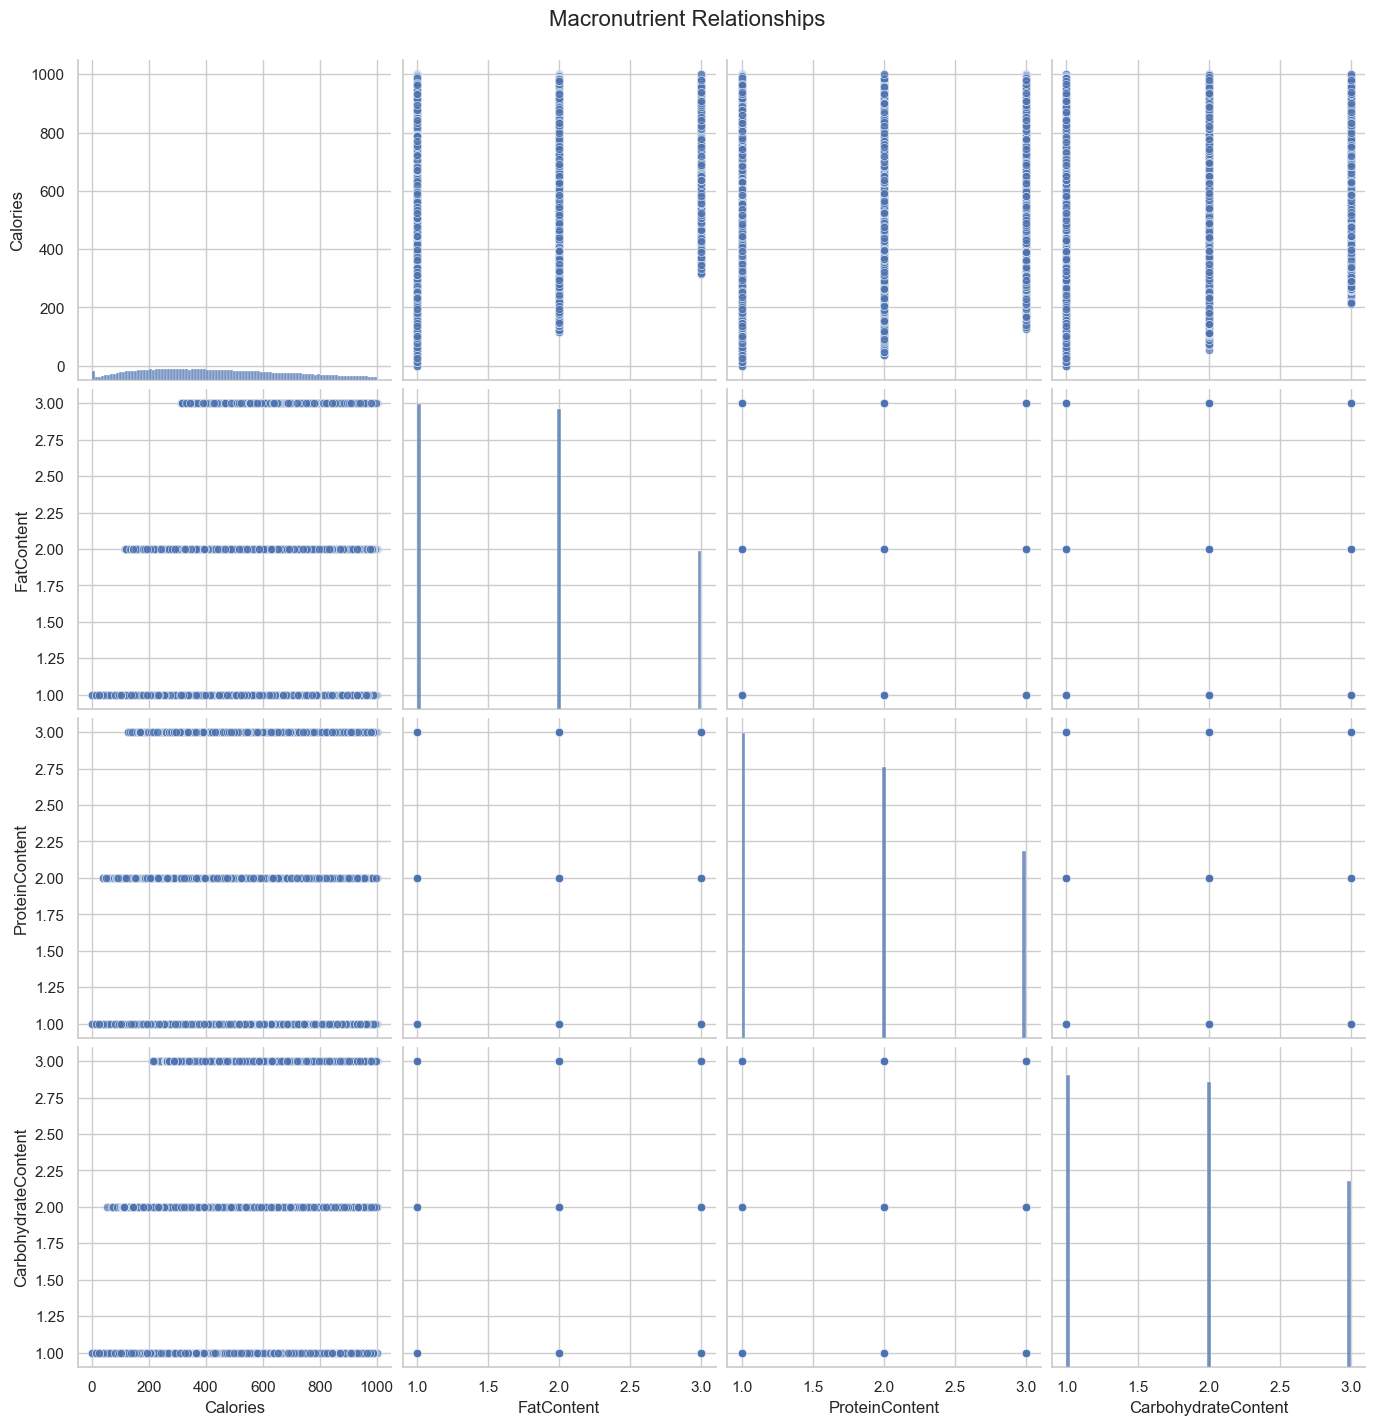

In [ ]:
sns.pairplot(diet_data_cleaned_cleaned[["Calories", "FatContent", "ProteinContent", "CarbohydrateContent"]],
             diag_kind="hist",  # Use histograms instead of KDE on the diagonal
             kind="scatter",    # Change to scatter plot for off-diagonal relationships
             height=3.5,         # Increase plot size for clarity
             plot_kws={'alpha': 0.7})  # Adjust transparency to reduce overlapping

plt.suptitle("Macronutrient Relationships", y=1.02, fontsize=16)
plt.show()


#### Category vs. Macronutrients
##### Compare macronutrient profiles across categories.

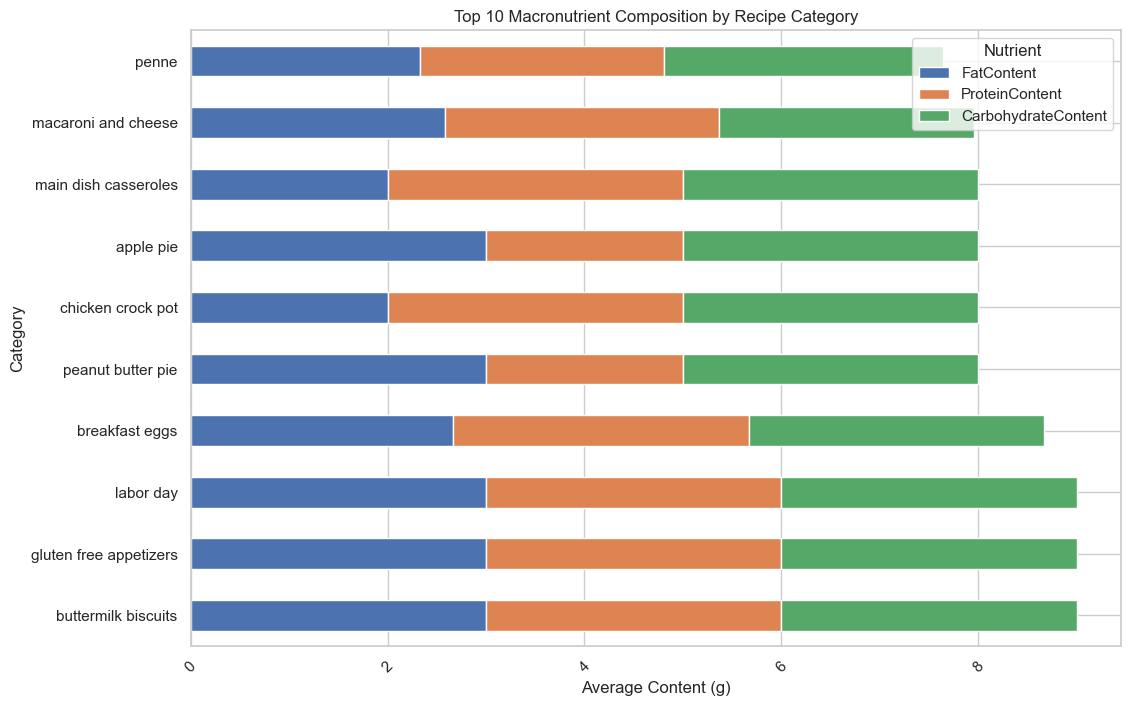

In [ ]:
avg_macronutrients_by_category = diet_data_cleaned.groupby("RecipeCategory")[["FatContent", "ProteinContent", "CarbohydrateContent"]].mean()


# Limit the number of categories, e.g., top 10 based on ProteinContent
top_categories = avg_macronutrients_by_category.mean(axis=1).sort_values(ascending=False).head(10).index
avg_macronutrients_top = avg_macronutrients_by_category.loc[top_categories]

# Plot with horizontal bars for better readability
avg_macronutrients_top.plot(kind="barh", stacked=True, figsize=(12, 8))

# Title and labels
plt.title("Top 10 Macronutrient Composition by Recipe Category")
plt.xlabel("Average Content (g)")
plt.ylabel("Category")
plt.legend(title="Nutrient")

# Rotate the x-axis labels if needed (in case of overlap)
plt.xticks(rotation=45)

# Show plot
plt.show()


### Recipes Similarity using KNN

In [ ]:
diet_data_cleaned.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions', 'Calories_range'],
      dtype='object')

In [ ]:
# Numerical features to use for similarity calculations
numerical_features = ['CookTime', 'PrepTime', 'TotalTime', 'Calories', 
                      'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                      'SodiumContent', 'CarbohydrateContent', 'FiberContent', 
                      'SugarContent', 'ProteinContent']
# Check for missing features in the dataset
missing_features = set(numerical_features) - set(diet_data_cleaned.columns)
if missing_features:
    print("Missing features:", missing_features)
else:
    print("All features exist in the dataset.")


All features exist in the dataset.


In [ ]:
# Numerical features to use for similarity calculations
numerical_features = ['CookTime', 'PrepTime', 'TotalTime', 'Calories', 
                      'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                      'SodiumContent', 'CarbohydrateContent', 'FiberContent', 
                      'SugarContent', 'ProteinContent']

# Ensure these features exist in the dataset
feature_vector = diet_data_cleaned[numerical_features].fillna(0)


In [ ]:
# Scale the features
scaler = StandardScaler()
feature_vector = pd.DataFrame(scaler.fit_transform(feature_vector), 
                              columns=numerical_features)


In [ ]:
# Initialize and train the Nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_model.fit(feature_vector)


NearestNeighbors(metric='euclidean')

In [ ]:
def find_similar_recipes(recipe_index, n=5):
    """
    Find similar recipes using the KNN model.

    Parameters:
    - recipe_index: Index of the recipe to compare.
    - n: Number of similar recipes to return.

    Returns:
    - DataFrame containing the similar recipes.
    """
    # Extract the feature vector for the given recipe
    test_vector = feature_vector.iloc[[recipe_index]]

    # Find similar recipes using KNN
    distances, indices = knn_model.kneighbors(test_vector, n_neighbors=n)

    # Fetch the details of similar recipes
    similar_recipes = diet_data_cleaned.iloc[indices[0]].copy()
    similar_recipes['SimilarityScore'] = 1 / (1 + distances[0])  # Higher is better
    return similar_recipes


In [ ]:
# Example: Find similar recipes to the first recipe in the dataset
recipe_index = 0  # Replace with the index of the recipe you want to compare

# Get the similar recipes
similar_recipes = find_similar_recipes(recipe_index, n=5)

# Display the results
print("Recipe you are comparing:", diet_data_cleaned.iloc[recipe_index]["Name"])
print("Top similar recipes:")
similar_recipes[["Name", "RecipeCategory", "Calories", "SimilarityScore"]]


Recipe you are comparing: Low-Fat Berry Blue Frozen Dessert
Top similar recipes:


,Name,RecipeCategory,Calories,SimilarityScore
0,Low-Fat Berry Blue Frozen Dessert,frozen desserts,278.858966,1.000000
449518,Crock Pot Apple Pumpkin Butter (No Added Sugar),pumpkin,244.103577,0.981382
174870,California Summer Pudding,dessert,288.812387,0.981370
57380,A Wild Guess Carrot Salad,vegetable,306.108496,0.978470
217256,Cucumber and Avocado Soup,unknown,293.054829,0.977212


C:\Users\mrmte\AppData\Local\Temp\ipykernel_4912\1501205662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


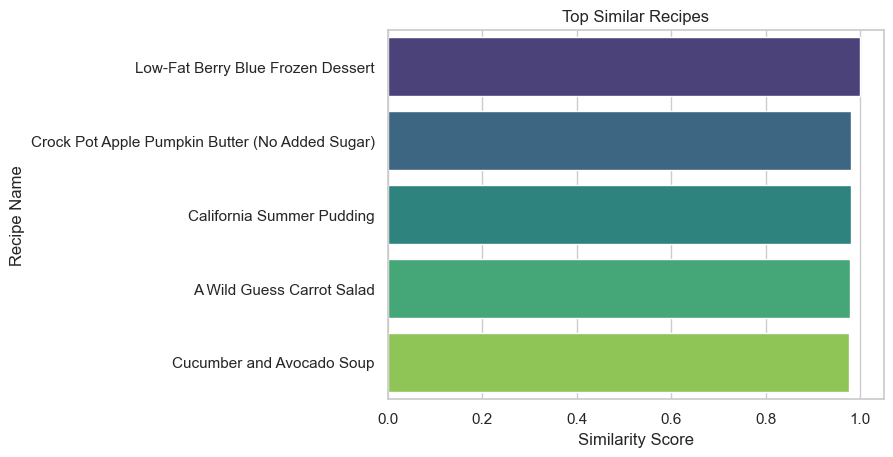

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the similarity scores
sns.barplot(
    data=similar_recipes,
    x="SimilarityScore",
    y="Name",
    palette="viridis"
)
plt.title("Top Similar Recipes")
plt.xlabel("Similarity Score")
plt.ylabel("Recipe Name")
plt.show()


###  Recipe Similarity Using KMeans

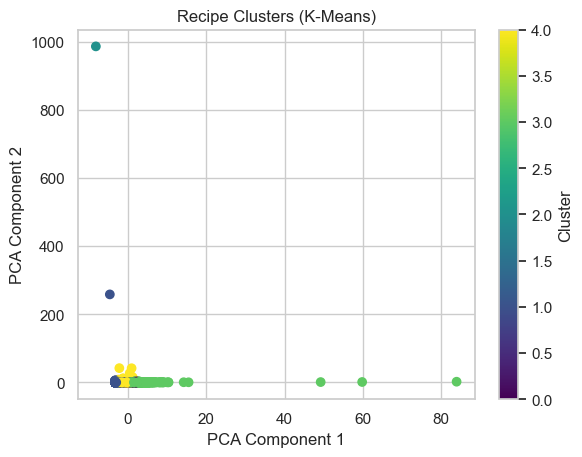

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = ['CookTime', 'PrepTime', 'TotalTime', 'Calories', 
                    'FatContent', 'SaturatedFatContent', 'CholesterolContent', 
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 
                    'SugarContent', 'ProteinContent']

# Standardize the data
scaler = StandardScaler()
cluster_data = scaler.fit_transform(diet_data_cleaned[cluster_features])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust 'n_clusters' based on your needs
diet_data_cleaned['Cluster'] = kmeans.fit_predict(cluster_data)

# Visualize clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(cluster_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=diet_data_cleaned['Cluster'], cmap='viridis')
plt.title("Recipe Clusters (K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()
